In [1]:
import dataclasses

import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
from matplotlib.lines import Line2D


%matplotlib ipympl

In [2]:
def make_slider(
    vmin: float,
    vmax: float,
    logscale: bool = True,
    n_steps: int = 400,
) -> widgets.FloatSlider | widgets.FloatLogSlider:
    if logscale:
        logmin = np.log10(vmin)
        logmax = np.log10(vmax)
        logstep = (logmax - logmin) / n_steps
        return widgets.FloatLogSlider(
            min=logmin,
            max=logmax,
            step=logstep,
            value=10 ** ((logmax + logmin) / 2.0),
            base=10,
            readout_format=".3e",
        )
    else:
        str_vmin = str(min(abs(vmin), abs(vmax)))
        dot = str_vmin.find(".")
        if dot != -1:
            format_n = len(str_vmin[dot + 1: ].rstrip("0"))
            readout_format=f".{format_n + 1}e"
        else:
            readout_format = ".2f"
        return widgets.FloatSlider(
            min=vmin,
            max=vmax,
            step=(vmax - vmin) / n_steps,
            value=(vmax + vmin) / 2,
            readout_format=readout_format,
        )

In [3]:
def savefig_widgets(fig: Figure) -> list:
    text = widgets.Text(
        value="figure.png",
        description="Filename:",
        disabled=False,
    )
    button = widgets.Button(description="Save File")
    output = widgets.Output()

    def on_button_clicked(b):
        filename = text.value
        if any([filename.endswith(ext) for ext in [".png", ".svg", ".pdf"]]):
            fig.savefig(filename)
        else:
            with output:
                print("Enter valid file name!")
    
    button.on_click(on_button_clicked)
    return [text, button, output]

In [4]:
def make_toxin_widget(**kwargs) -> widgets.VBox:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_title("Motor output decreased by toxin")
    
    @dataclasses.dataclass
    class State:
        line: Line2D | None = None

    state = State()

    x = np.linspace(0, 10, 1000)
    def update_figure(alpha, t0):
        y = 1.0 / (1.0 + alpha * np.exp(t0 - x))
        if state.line is None:
            ax.grid(True, which="major")
            ax.set_xlabel("Energy", fontsize=12)
            ax.set_ylabel("Decrease Ratio", fontsize=12)
        else:
            state.line.remove()
        
        state.line = ax.plot(x, y, color="xkcd:bluish purple")[0]
        fig.canvas.draw()
        fig.canvas.flush_events()

    sliders = {key: make_slider(*range_) for key, range_ in kwargs.items()}
    interactive = widgets.interactive(update_figure, **sliders)
    return widgets.VBox(savefig_widgets(fig) + [interactive])

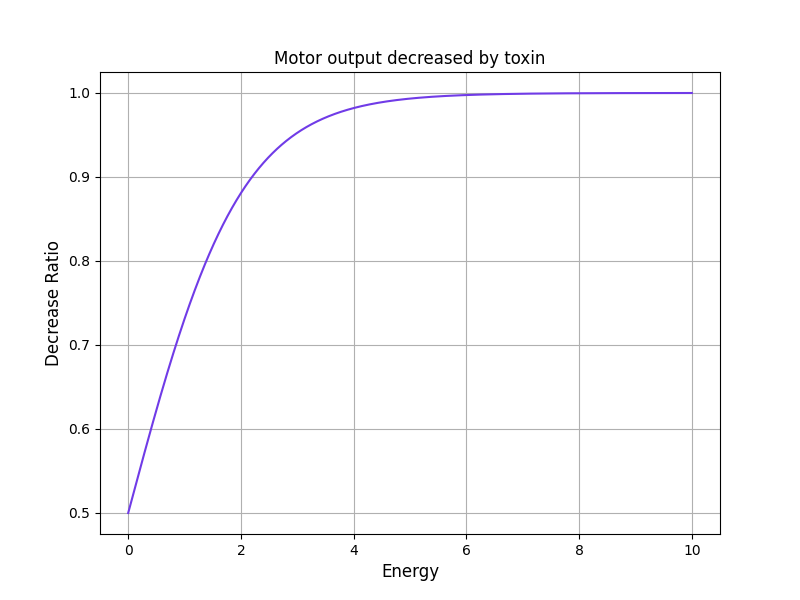

In [5]:
make_toxin_widget(
    alpha=(0.1, 10.0),
    t0=(-10, 10, False),
)